<a href="https://colab.research.google.com/github/jvrscak/Analiza-utjecaja-prehrane-na-rezultate-sporta-a/blob/main/projekt_iz_PZAP_JanVr%C5%A1%C4%8Dak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJETK PZAP**  
**ANALIZA UTJECAJA PREHRANE NA REZULTATE SPORTAŠA**  
**STUDIJ: INFORMACIJSKI I POSLOVNI SUSTAVI**  
**SMJER: UMJETNA INTELIGENCIJA U POSLOVANJU**  
**GODINA: 3.**  
**IME I PREZIME: JAN VRŠČAK**  
**VARAŽDIN, SIJEČANJ, 2026.**


**UVOD**  
Cilj projekta je ispitati postoji li povezanost između nutritivnog sastava prehrane npr. kalorije, proteini, ugljikohidrati te sportskih performansi.  
Prehrana ima važnu ulogu u životima sportaša jer izravno utječe na fizičku spremu, oporavak i postizanje sportskih rezultata. U suvremenom sportu sve se veći naglasak stavlja na individualizirani pristup prehrani sportaša, a odluke se temelje na analizi podataka, a ne prema preporukama. Osobna motivacija za ovu temu je moja ljubav prema sportu te bavljenje sportom kroz cijeli život. Osim toga, motivacija za odabir ove teme je da se povežu sport i analiza podataka i da se kroz konkretan primjer pokaže kako se podatci iz različitih izvora mogu integrirati i analizirati u svrhu donošenja zaključaka. Korištenjem podataka o nutritivnim vrijednostima namirnica i podataka o sportašima moguće je istražiti potencijalne povezanosti između prehrambenih karakteristika i sportskih performansi. Dodatna motivacija je tehnički aspekt da se povežu heterogeni skupovi podataka, JSON i CSV, te njihovo pretprocesiranje i integracija te implementacija jednostavnog sustava za pohranu i pristup podatcima.

**OPIS IMPLEMENTACIJE I PRIKAZ RADA APLIKACIJE**

**Uvođenje i učitavanje podataka**



U projektu korištena su dva odvojena skupa podataka. Prvi skup je CSV format koji se odnosi na sportaše te njihove namirnice koej koriste i sportski uspjeh. Taj skup podataka je generiran preko web stranice generatedata.com.[2] Drugi skup podataka je u JSON formatu i odnosi se na nutritivne vrijednosti namirnica, uključujući energetsku vrijednost, proteine, ugljikohidrate, masti. Taj format je preuzet sa stranica OpenFoodFacts.[1]   
Kako bih preuzeo JSON podatke sa stranice OpenFoodFacts, morao sam preuzeti podatke preko sljedećeg linka: https://world.openfoodfacts.org/api/v0/product/4056489148739.json , a to znači da sam prvo pronašao proizvod preko stranice OpenFoodFacts i onda sam upisao barkod tog proizvoda u link i preuzeo JSON podatke.[1]

In [6]:
import pandas as pd
import numpy as np
import json

In [7]:
df_sport = pd.read_csv('podaci_o_sportasu.csv')
df_sport.head()

,athlete_id,sport,age,weight_kg,height_cm,training_hours_per_week,product_1,product_2,product_3,performance_score
0,581,Running,39,69,172,19,Shrimp,Cottage Cheese,Walnuts,87
1,567,Running,40,85,197,18,Tomato,Blueberries,Apple,53
2,2,Football,27,61,163,5,Blueberries,Shrimp,Salmon,95
3,235,Cycling,37,65,193,16,Sunflower Seeds,Apple,Broccoli,67
4,571,Cycling,18,63,178,10,Oatmeal,Brown Rice,Walnuts,78


In [8]:
with open("namirnice.json", "r") as f:
    namirnice = json.load(f)

In [9]:
type(namirnice)
namirnice[0]

{'product_name': 'Eggs',
 'nutriments': {'energy-kcal_value': 78.65,
  'proteins_value': 7.755,
  'carbohydrates_value': 0,
  'sugars_value': 0,
  'fat_value': 5.28,
  'saturated-fat_value': 1.485,
  'fiber_value': 0,
  'calcium_value': 0,
  'potassium_value': 0}}

In [10]:
type(namirnice)
namirnice[3]

{'product_name': 'Almonds',
 'nutriments': {'energy-kcal_value': 186,
  'proteins_value': 7.4,
  'carbohydrates_value': 1.4,
  'sugars_value': 1,
  'fat_value': 16,
  'saturated-fat_value': 1.3,
  'fiber_value': 2.4,
  'calcium_value': 0.236,
  'potassium_value': 0.659}}

**Pretprocesiranje podataka**  

Pretprocesiranje je provedeno s ciljem pripreme podataka za daljnu analizu i integraciju. Treba se osigurati konzistentnost i ispravnost podataka budući da su skupovi u različitim formatima.

Za početak, uklonio sam nepotrebne nutrijente i ostavio sam energetsku vrijednost, proteine, ugljikohidrate i masti. Napravio sam tablični oblik i izravnao ugniježđeni JSON.

In [11]:
hrana = []

for i in namirnice:
    namirnice = i.get("nutriments", {})
    hrana.append({
        "product_name": i.get("product_name", "").lower().strip(),
        "calories": i.get("nutriments", {}).get("energy-kcal_value", 0),
        "proteins": i.get("nutriments", {}).get("proteins_value", 0),
        "carbohydrates": i.get("nutriments", {}).get("carbohydrates_value", 0),
        "fats": i.get("nutriments", {}).get("fat_value", 0)
    })

hrana_df = pd.DataFrame(hrana)
hrana_df.head()


,product_name,calories,proteins,carbohydrates,fats
0,eggs,78.65,7.755,0.0,5.28
1,banana,90.50,1.060,19.7,0.25
2,broccoli,40.40,2.000,7.2,0.40
3,almonds,186.00,7.400,1.4,16.00
4,olive oil,828.00,0.000,0.0,92.00


Ukoliko postoje zapisi bez imena proizvoda, potrebno ih je ukloniti i treba osigurati da svi podatci o nutritivnim vrijednostima budu numeričkog tipa.

In [12]:
hrana_df = hrana_df[hrana_df["product_name"] != ""]

In [13]:
from numpy._core import numeric
numeric_columns = ["calories", "proteins", "carbohydrates", "fats"]
hrana_df[numeric_columns] = hrana_df[numeric_columns].apply(pd.to_numeric, errors="coerce")
hrana_df.fillna(0, inplace=True)

Nakon što je odrađeno pretprocesiranje JSON podataka, sada je potrebno pretprocesirati CSV podatke. Podatci o sportašima zapisani su u CSV formatu. Tamo su nam bitni podatci o konzumiranim proizvodima (product_1, product_2, product_3) i oni služe kao poveznica za podatke o namirnicama. Nema nedostajućih vrijednosti pa nema potrebe za uklanjanjem. Ali, zato sam nazive proizvoda oba skupa standardizirao, odnosno pretvorio ih u mala slova i uklonio nepotrebne znakove kako bi se mogla provesti faza integracije.

In [14]:
for col in ["product_1", "product_2", "product_3"]:
    df_sport[col] = df_sport[col].str.lower().str.strip()

In [15]:
df_sport.head()

,athlete_id,sport,age,weight_kg,height_cm,training_hours_per_week,product_1,product_2,product_3,performance_score
0,581,Running,39,69,172,19,shrimp,cottage cheese,walnuts,87
1,567,Running,40,85,197,18,tomato,blueberries,apple,53
2,2,Football,27,61,163,5,blueberries,shrimp,salmon,95
3,235,Cycling,37,65,193,16,sunflower seeds,apple,broccoli,67
4,571,Cycling,18,63,178,10,oatmeal,brown rice,walnuts,78


**INTEGRACIJA PODATAKA**

In [16]:
nutrient_dict = hrana_df.set_index("product_name")[["calories", "proteins", "carbohydrates", "fats"]].to_dict(orient="index")

In [17]:
def get_nutrients_safe(product):
    if product in nutrient_dict:
        return nutrient_dict[product]
    else:
        return {"calories": 0, "proteins": 0, "carbohydrates": 0, "fats": 0}

In [18]:
df_sport["total_calories"] = 0.0
df_sport["total_proteins"] = 0.0
df_sport["total_carbohydrates"] = 0.0
df_sport["total_fats"] = 0.0

for i, athlete in df_sport.iterrows():
    total_calories = 0.0
    total_proteins = 0.0
    total_carbohydrates = 0.0
    total_fats = 0.0

    for product_col in ["product_1", "product_2", "product_3"]:
        nutrients = get_nutrients_safe(athlete[product_col])
        total_calories += nutrients["calories"]
        total_proteins += nutrients["proteins"]
        total_carbohydrates += nutrients["carbohydrates"]
        total_fats += nutrients["fats"]

    df_sport.at[i, "total_calories"] = total_calories
    df_sport.at[i, "total_proteins"] = total_proteins
    df_sport.at[i, "total_carbohydrates"] = total_carbohydrates
    df_sport.at[i, "total_fats"] = total_fats

In [19]:
df_sport.head(20)

,athlete_id,sport,age,weight_kg,height_cm,training_hours_per_week,product_1,product_2,product_3,performance_score,total_calories,total_proteins,total_carbohydrates,total_fats
0,581,Running,39,69,172,19,shrimp,cottage cheese,walnuts,87,859.00,39.900,6.200,73.700
1,567,Running,40,85,197,18,tomato,blueberries,apple,53,155.70,1.770,28.400,2.530
2,2,Football,27,61,163,5,blueberries,shrimp,salmon,95,327.70,36.570,11.200,14.030
3,235,Cycling,37,65,193,16,sunflower seeds,apple,broccoli,67,755.40,24.100,25.200,60.700
4,571,Cycling,18,63,178,10,oatmeal,brown rice,walnuts,78,1476.00,32.100,124.900,90.200
5,459,Weightlifting,33,74,169,19,shrimp,avocado,olive oil,83,1087.00,15.600,2.000,112.200
6,515,Running,19,67,158,17,bell peppers,protein bar,bell peppers,89,473.00,17.700,40.800,22.700
7,59,CrossFit,24,109,167,17,whole wheat bread,chicken breast,spinach,95,194.00,27.300,12.500,4.400
8,472,Basketball,19,107,183,15,beans,tuna,sweet potato,46,510.00,38.000,64.300,14.700
9,343,Cycling,29,82,159,13,pasta,quinoa,salmon,65,681.10,38.510,89.710,17.199


Integracija podataka provedena je tako da su podatci o sportašima povezani s nutritivnim vrijednostima proizvoda koje konzumiraju. Dohvaćene su vrijednosti za svakog sportaša za proizvode product_1, product_2, product_3. Ako nije pronađen u sklopu podataka o namirnicama, njegove nutritivne vrijednosti postavljene su na nulu. Ukupni unos kalorija i makronutrijenata postignut je zbrajanjem vrijednosti svih tri proizvoda. Svaki sportaš ima jedan red s ukupnim nutritivnim vrijednostima i omogućuje daljnju analizu i vizualizaciju.

**POHRANA PODATAKA**

In [20]:
import sqlite3

In [21]:
conn = sqlite3.connect("sport_data.db")
cursor = conn.cursor()

In [22]:
df_sport.to_sql(
    name="sport_data",
    con=conn,
    if_exists="replace",
    index=False
)

500

In [23]:
pd.read_sql("SELECT * FROM sport_data LIMIT 5", conn)

,athlete_id,sport,age,weight_kg,height_cm,training_hours_per_week,product_1,product_2,product_3,performance_score,total_calories,total_proteins,total_carbohydrates,total_fats
0,581,Running,39,69,172,19,shrimp,cottage cheese,walnuts,87,859.0,39.90,6.2,73.70
1,567,Running,40,85,197,18,tomato,blueberries,apple,53,155.7,1.77,28.4,2.53
2,2,Football,27,61,163,5,blueberries,shrimp,salmon,95,327.7,36.57,11.2,14.03
3,235,Cycling,37,65,193,16,sunflower seeds,apple,broccoli,67,755.4,24.10,25.2,60.70
4,571,Cycling,18,63,178,10,oatmeal,brown rice,walnuts,78,1476.0,32.10,124.9,90.20


Integrirani skup podataka pohranjen je u relacijsku bazu podataka SQLite u tablicu sport_data. Baza omogućuje trajnu pohranu podataka i jednostavan pristup za daljnju analizu ili izradu API-ja. Pohrana je provedena korištenjem funkcije pandas.to_sql koja automatski kreira tablicu u bazi i popunjava je podatcima iz DataFrame-a. Ispis podataka iz baze smo napravili SELECT upitom.

**IZRADA SUČELJA ZA REST API**

In [24]:
!pip install flask

In [25]:
!pip install pyngrok

In [39]:
import threading
import sqlite3
from flask import Flask, jsonify
from pyngrok import ngrok, conf

ngrok.kill()


conf.get_default().auth_token = "38et8pyWSGCDEh2l7TtnZMKjlRl_4DGbo2suH398eeUgV9hLo"


app = Flask(__name__)
port = 5000


public_url = ngrok.connect(port).public_url
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"")
app.config["BASE_URL"] = public_url


def get_db_connection():
    conn = sqlite3.connect("sport_data.db")
    conn.row_factory = sqlite3.Row
    return conn


@app.route("/")
def index():
    return "Sports Nutrition API is running!"

@app.route("/athletes", methods=["GET"])
def get_athletes():
    conn = get_db_connection()
    data = conn.execute("SELECT * FROM sport_data").fetchall()
    conn.close()
    return jsonify([dict(row) for row in data])

@app.route("/athletes/<int:athlete_id>", methods=["GET"])
def get_athlete(athlete_id):
    conn = get_db_connection()
    athlete = conn.execute(
        "SELECT * FROM sport_data WHERE athlete_id = ?",
        (athlete_id,)
    ).fetchone()
    conn.close()

    if athlete is None:
        return jsonify({"error": "Sportaš nije pronađen"}), 404

    return jsonify(dict(athlete))


threading.Thread(
    target=app.run,
    kwargs={"port": port, "use_reloader": False}
).start()

 * ngrok tunnel "https://protrusile-virilocally-jennette.ngrok-free.dev" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


Za omogućavanje jednostavnog pristupa integriranim podatcima o sportašima i nutritivnim vrijednostima, implementiran je REST API pomoću Python biblioteke Flask. REST API omogućuje dohvat podataka putem HTTP zahtjeva. Glavne komponente su Flask aplikacija, a Flask je web framework u Pythonu koji omogućuje kreiranje API-ja. Zatim, podatci iz df_sport pohranjeni su u SQLite bazu sport_data.db. Baza sadrži tablicu sport_data s podatcima o sportašima, konzumiranim proizvodima i ukupnim nutritivnim vrijednostima. REST API dohvaća podatke iz baze pomoću SQL upita. Imamo rute API-ja, prvo / je testna ruta da je API aktivan, /athletes je GET zahtjev za dohvat svih sportaša, a /athletes/athlete_id je GET zahtjev za dohvat određenog sportaša. Koristio sam ngrok tunel za omogućavanje javnog pristupa API-ju izvan Colaba te sam se za to trebao prijaviti putem ngrok stranice da bih dobio token. Ngrok stvara privremeni javni URL koji mapira lokalni port Flask servera 5000.

**Bazična analiza podataka i vizualizacija**

PREGLED PODATAKA - provjeriti raspon vrijednosti i osnovne statistike nutritivnih vrijednosti i performansi sportaša

In [31]:
df_sport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   athlete_id               500 non-null    int64  
 1   sport                    500 non-null    object 
 2   age                      500 non-null    int64  
 3   weight_kg                500 non-null    int64  
 4   height_cm                500 non-null    int64  
 5   training_hours_per_week  500 non-null    int64  
 6   product_1                500 non-null    object 
 7   product_2                500 non-null    object 
 8   product_3                500 non-null    object 
 9   performance_score        500 non-null    int64  
 10  total_calories           500 non-null    float64
 11  total_proteins           500 non-null    float64
 12  total_carbohydrates      500 non-null    float64
 13  total_fats               500 non-null    float64
dtypes: float64(4), int64(6), o

In [42]:
df_sport.head()

,athlete_id,sport,age,weight_kg,height_cm,training_hours_per_week,product_1,product_2,product_3,performance_score,total_calories,total_proteins,total_carbohydrates,total_fats
0,581,Running,39,69,172,19,shrimp,cottage cheese,walnuts,87,859.0,39.90,6.2,73.70
1,567,Running,40,85,197,18,tomato,blueberries,apple,53,155.7,1.77,28.4,2.53
2,2,Football,27,61,163,5,blueberries,shrimp,salmon,95,327.7,36.57,11.2,14.03
3,235,Cycling,37,65,193,16,sunflower seeds,apple,broccoli,67,755.4,24.10,25.2,60.70
4,571,Cycling,18,63,178,10,oatmeal,brown rice,walnuts,78,1476.0,32.10,124.9,90.20


In [32]:
df_sport[["total_calories", "total_proteins", "total_carbohydrates", "total_fats", "performance_score"]].describe()

,total_calories,total_proteins,total_carbohydrates,total_fats,performance_score
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,638.383240,26.661186,38.477252,40.255190,69.886000
std,356.948356,13.883079,31.642754,35.889869,17.311857
min,94.000000,0.800000,0.000000,0.850000,40.000000
25%,345.650000,15.798500,14.175000,13.937250,55.000000
50%,566.850000,25.830000,28.350000,29.800000,70.000000
75%,859.500000,35.427500,59.000000,61.162500,85.250000
max,2197.000000,65.500000,192.600000,220.700000,100.000000


KORELACIJA NUTRITIVNIH VRIJEDNOSTI I PERFORMANSI I IZRADA HEATMAP

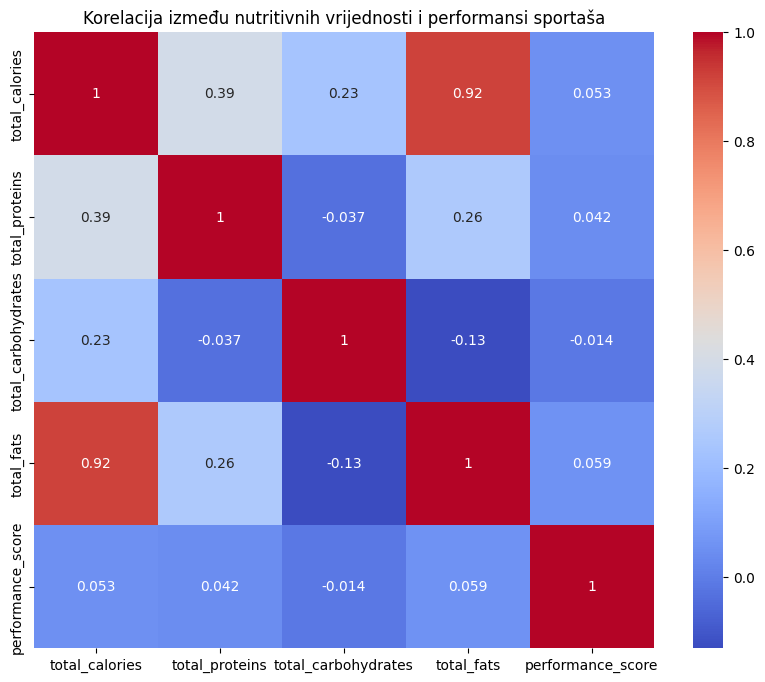

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_sport[["total_calories", "total_proteins", "total_carbohydrates", "total_fats", "performance_score"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelacija između nutritivnih vrijednosti i performansi sportaša")
plt.show()

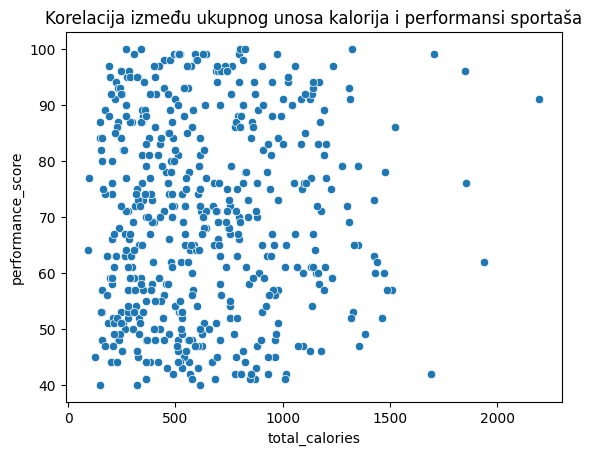

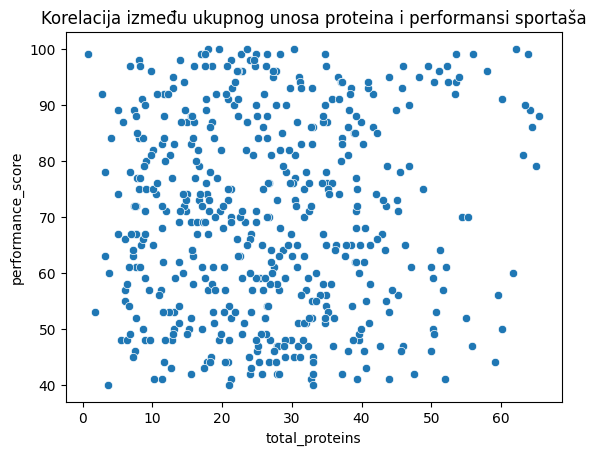

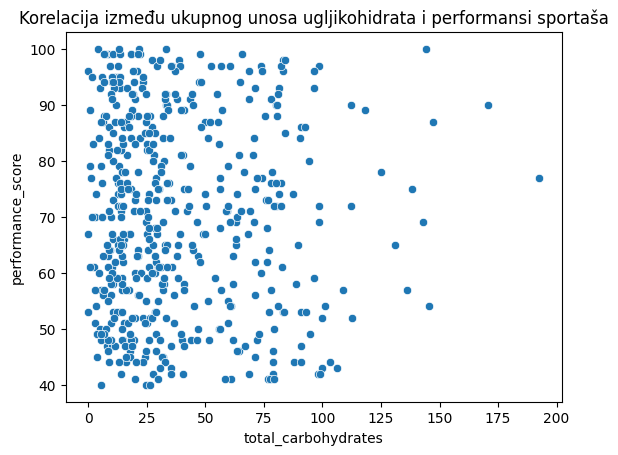

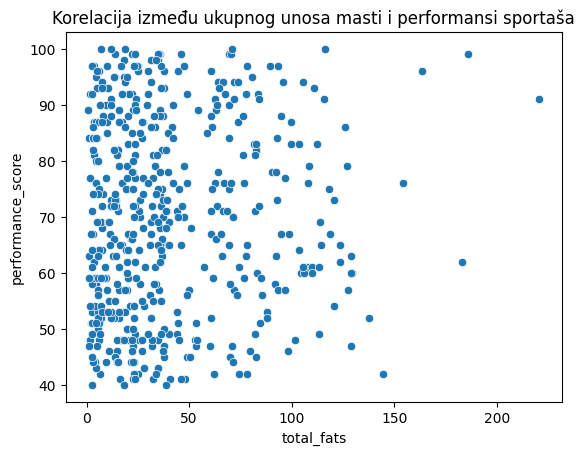

In [34]:
sns.scatterplot(data=df_sport, x="total_calories", y="performance_score")
plt.title("Korelacija između ukupnog unosa kalorija i performansi sportaša")
plt.show()

sns.scatterplot(data=df_sport, x="total_proteins", y="performance_score")
plt.title("Korelacija između ukupnog unosa proteina i performansi sportaša")
plt.show()

sns.scatterplot(data=df_sport, x="total_carbohydrates", y="performance_score")
plt.title("Korelacija između ukupnog unosa ugljikohidrata i performansi sportaša")
plt.show()

sns.scatterplot(data=df_sport, x="total_fats", y="performance_score")
plt.title("Korelacija između ukupnog unosa masti i performansi sportaša")
plt.show()

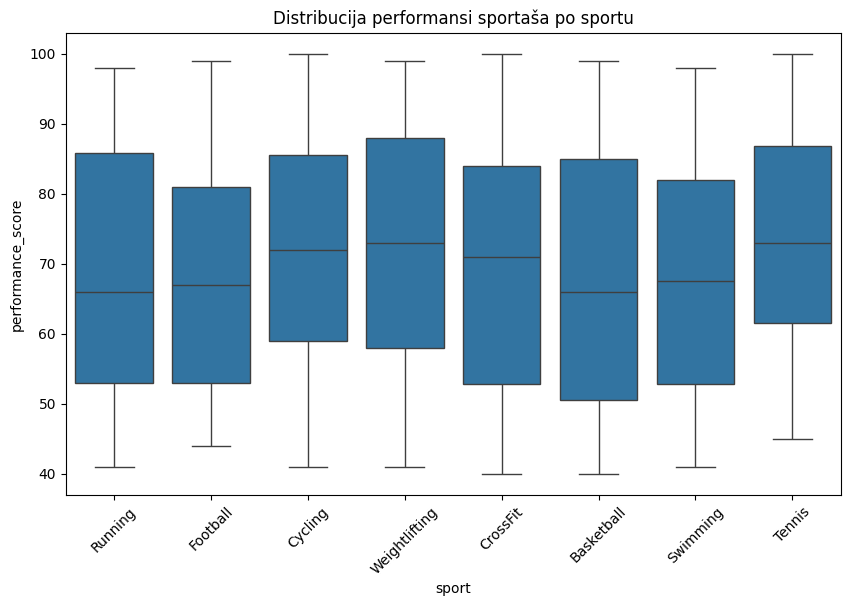

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sport, x="sport", y="performance_score")
plt.title("Distribucija performansi sportaša po sportu")
plt.xticks(rotation=45)
plt.show()

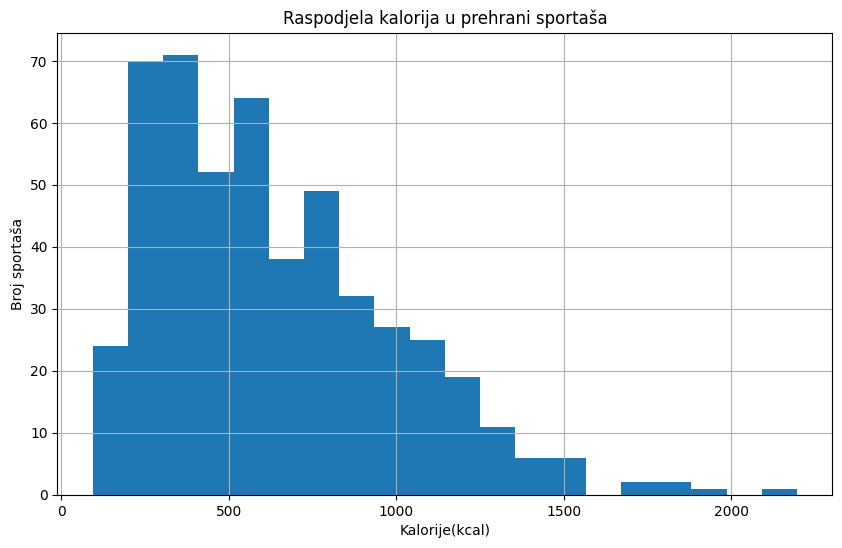

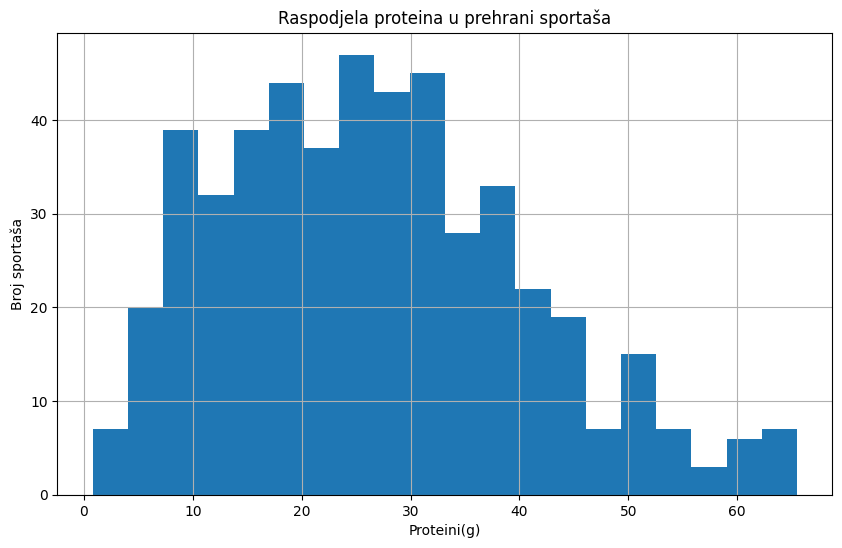

In [44]:
plt.figure(figsize=(10, 6))
df_sport["total_calories"].hist(bins=20)
plt.title("Raspodjela kalorija u prehrani sportaša")
plt.xlabel("Kalorije(kcal)")
plt.ylabel("Broj sportaša")
plt.show()

plt.figure(figsize=(10, 6))
df_sport["total_proteins"].hist(bins=20)
plt.title("Raspodjela proteina u prehrani sportaša")
plt.xlabel("Proteini(g)")
plt.ylabel("Broj sportaša")
plt.show()

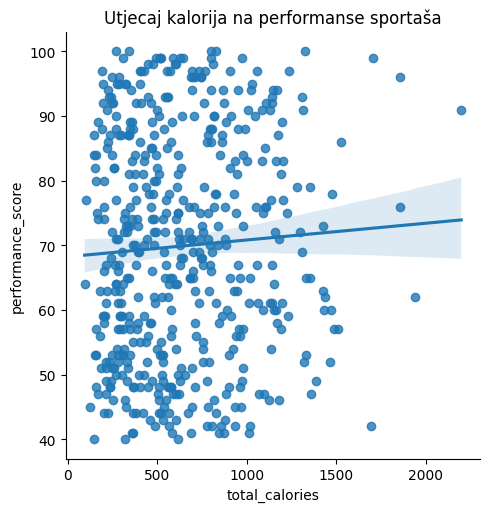

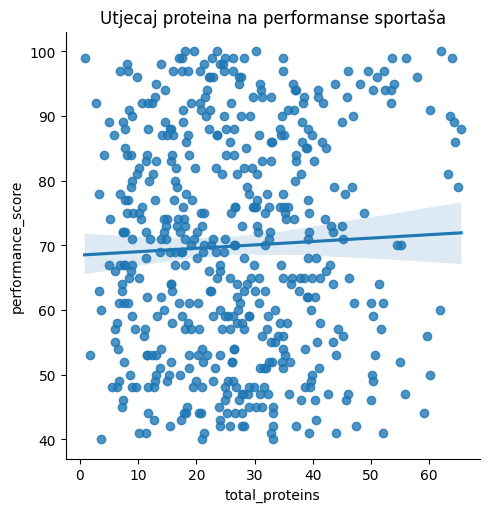

In [46]:
sns.lmplot(data=df_sport, x="total_calories", y="performance_score")
plt.title("Utjecaj kalorija na performanse sportaša")
plt.show()

sns.lmplot(data=df_sport, x="total_proteins", y="performance_score")
plt.title("Utjecaj proteina na performanse sportaša")
plt.show()

In [47]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df_sport[["total_calories", "total_proteins", "total_carbohydrates", "total_fats"]]
y = df_sport["performance_score"]

model = LinearRegression()
model.fit(X, y)

for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef:.2f}")

print(f"Intercept: {model.intercept_:.2f}")

total_calories: -0.03
total_proteins: 0.16
total_carbohydrates: 0.12
total_fats: 0.31
Intercept: 68.13


**KRITIČKI OSVRT - PRAKTIČNA IZVEDIVOST I PRIMJENA**

Provedeni projekt pokazuje da je integracija heterogenih skupova podataka, CSV i JSON, i njihova analiza izvediva uz korištenje suvremenih alata za obradu podataka u programskom jeziku Python. Korištenjem pandas, SQLite baze podataka i Flask REST API-ja omogućena je obrada, pohrana i dohvat podataka na strukturiran i skalabilan način.  
Ovakav sustav može imati stvarnu primjenu u sportu i području sportske analitike i nutricionizma. Mogu koristiti ovo treneri, nutricionisti i sportaši kako bi pratili što trebaju unositi od namirnica i njihov utjecaj na sportske performanse. REST API omogućuje jednostavnu integraciju s drugim sustavima recimo za praćenje prehrane.    
Ali opet kada se sagledaju ovi podatci, vidi se da su ti podatci samo korišteni u edukativne svrhe i ne predstavljaju najrealniju sliku. Osim same prehrane koju sam ja analizirao, na uspjeh sportaša puno utječe intenzitet treninga, genetika, dob, spol, psihičko stanje. Osim toga, podatci su preuzeti sa stranice OpenFoodFacts pa ti podatci mogu varirati ovisno o kvaliteti i unosu korisnika.  
Ali usprkos svemu, projekt kvalitetno demonstrira kako se podatci iz različitih izvora mogu pretprocesirati, integrirati, analizirati i učiniti dostupnima putem API-ja. Sustav je lako proširiv i moguće je dodati nove nutritivne parametre i time projekt predstavlja dobru osnovu za daljnji razvoj složenijih analitičkih sustava u području sporta.

**ZAKLJUČAK**

U ovome projektu prikazana je cjelovita implementacija sustava za analizu utjecaja prehrane na sportske performanse korištenjem metoda analize podataka. Korišteni su heterogeni izvori podataka u CSV i JSON formatu koji su uspješno pretprocesirani, integrirani i pohranjeni u relacijsku bazu podataka. Time sam prikazao cijeli proces rada s podatcima od prikupljanja do pripreme za analizu. Integracijom podataka o sportašima i namirnicama, omogućili smo izračunavanje ukupnog unosa kalorija i makronutrijenata za svakog sportaša. Na temelju tih podataka provedena je bazična analiza i vizualizacija i napravljen je jednostavni linearni regresijski model za povezivanje prehrambenih čimbenika i sportskih performansi. Dobiveni rezultati upućuju na to da prehrana može imati određeni utjecaj na rezultate sportaša i time se ističe doprinos masti i proteina, a kalorije i ugljikohidrati imaju slabiji pojedinačni utjecaj u okviru korištenog modela. Nadalje, projekt je obuhvatio i implementaciju REST API-ja koji omogućuje dohvat integriranih podataka iz baze podataka. Time je sustav pripremljen za daljnje analize i nadogradnju. Projekt obuhvaća znanja i tehnike koje su usvojene na kolegiju i pokazuje primjenu na stvarni problem iz domene sporta. Analiza je provedena na ograničenom broju podataka, ali projekt predstavlja dobru podlogu za daljnji razvoj naprednijih analitičkih sustava te složeniji broj varijabli i podataka.

**Konverzacija s umjetnom inteligencijom**  
U nastavku je poveznica na komunikaciju s alatom ChatGPT:  
https://chatgpt.com/share/6973b7c9-d690-8001-a166-737277e49699

**LITERATURA**  
[1] OpenFoodFacts, "OpenFoodFacts - Data", OpenFoodFacts.[Online]. Dostupno: https://world.openfoodfacts.org/data . [Pristupljeno: 21.1.2026.]  
[2] GenerateData, "Generate Data - Random Data Generator", GenerateData. [Online]. Dostupno: https://generatedata.com/ . [Pristupljeno: 20.1.2026.]  
[3]Materijali predavanja i laboratorijskih vježbi sa moodle